In [ ]:
!pip install clip

/content/cifar-100/test
/content/cifar-100/meta
/content/cifar-100/train


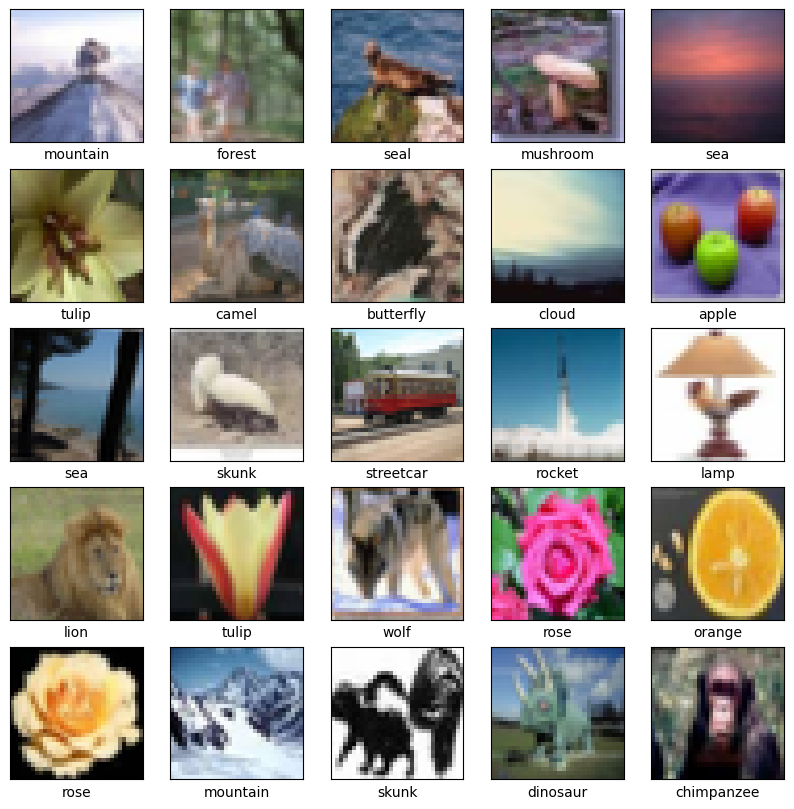

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 32)          │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,103,300 (4.21 MB)

 Trainable params: 1,103,300 (4.21 MB)

 Non-trainable params: 0 (0.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
THE CLASSES CHOOSEN MANY TIMES
clase: castle (17) counts: 9727
THE CLASSES NOT CHOOSEN
clase: apple (0) counts: 0
clase: baby (2) counts: 0
clase: bear (3) counts: 0
clase: beaver (4) counts: 0
clase: bed (5) counts: 0
clase: bee (6) counts: 0
clase: beetle (7) counts: 0
clase: bicycle (8) counts: 0
clase: bottle (9) counts: 0
clase: bowl (10) counts: 0
clase: boy (11) counts: 0
clase: bridge (12) counts: 0
clase: bus (13) counts: 0
clase: butterfly (14) counts: 0
clase: caterpillar (18) counts: 0
clase: cattle (19) counts: 0
clase: chair (20) counts: 0
clase: chimpanzee (21) counts: 0
clase: clock (22) counts: 0
clase: cloud (23) counts: 0
clase: cockroach (24) counts: 0
clase: couch (25) counts: 0
clase: crab (26) counts: 0
clase: crocodile (27) counts: 0
clase: dinosaur (29) counts: 0
clase: dolphin (30) counts: 0
clase: elephant (31) counts: 0
clase: flatfish (32) counts: 0
clase: fox (34) counts: 0
clase: girl (35) counts: 0
clase: hamster

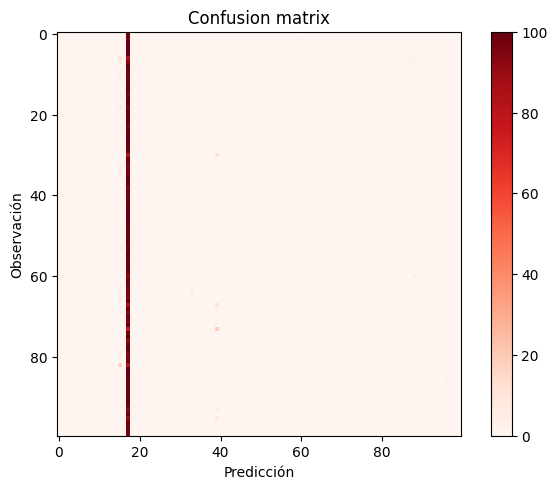

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


def unpick(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

for dirname, _, filenames in os.walk('/content/cifar-100/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data_pre_path = '/content/cifar-100/' # change this path
# File paths
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
data_meta_path = data_pre_path + 'meta'

# Read dictionary
data_train = unpick(data_train_path)
data_test = unpick(data_test_path)
data_meta = unpick(data_meta_path)

subCategory = pd.DataFrame(data_meta['fine_label_names'], columns=['SubClass'])
subCategoryDict = subCategory.to_dict()

X_train = data_train['data']
y_train=data_train['fine_labels']


X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

X_train = X_train.reshape(len(X_train),3,32,32).transpose(0,2,3,1)
X_valid = X_valid.reshape(len(X_valid),3,32,32).transpose(0,2,3,1)

#transforming the testing dataset
X_test = data_test['data']
X_test = X_test.reshape(len(X_test),3,32,32).transpose(0,2,3,1)
y_test = data_test['fine_labels']

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_valid = np.asarray(X_valid)
y_valid = np.asarray(y_valid)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

###############################################################################
# comprobar las labels de algunas imágenes
###############################################################################
plt.figure(figsize=(10,10))
for image in range(0,25):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0# añadir de 25 en 25 para cambiar el bloque de fotos
    data_plot = X_test[j]
    plt.imshow(data_plot)
    plt.xlabel(str(subCategoryDict['SubClass'][y_test[j]]))
plt.show()


##############################################################################
#plot history
##############################################################################

def plot_history(history):
    val_loss = history.history['val_loss' ]
    loss =     history.history['loss' ]
    acc =      history.history['accuracy' ]
    val_acc =  history.history['val_accuracy' ]

    epochs    = range(1,len(acc)+1,1)

    plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
    plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
    plt.title ('Training and validation accuracy')
    plt.ylabel('acc')
    plt.xlabel('epochs')
    plt.legend()

    plt.figure()

    plt.plot  ( epochs,     loss, 'r--', label='Training loss' )
    plt.plot  ( epochs, val_loss ,  'b', label='Validation loss' )
    plt.title ('Training and validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.figure()

##############################################################################
#MODEL KERAS
##############################################################################
model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()


opt = 'adam'

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


###############################################################################
#PREPROCESADO CON ImageDataGenerator
###############################################################################

augmenter = ImageDataGenerator(rescale=1.0/255.,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.2,
                             fill_mode='nearest',
                             horizontal_flip=True)
rescalator=ImageDataGenerator(rescale=1.0/255.)

train_generator=augmenter.flow(X_train, y_train, batch_size=20)
valid_generator=rescalator.flow(X_valid, y_valid, batch_size=20)
test_generator=rescalator.flow(X_test, y_test, batch_size=20)





###############################################################################
# confussion matrix
###############################################################################
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
confusion_mtx = confusion_matrix(y_test, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(100))


idx,counts =np.unique(Y_pred_classes,return_counts=True,axis=0)
np.unique(Y_pred_classes,return_counts=True,axis=0)

print('THE CLASSES CHOOSEN MANY TIMES')
for number in range(idx.shape[0]):
    clase=idx[number]
    if counts[number]>500:
        print('clase: ' +(str(subCategoryDict['SubClass'][clase]))+' ('+str(clase) +') counts: '+str(counts[number]))


print('THE CLASSES NOT CHOOSEN')
for all_classes in range(100):
    found=False
    for i in range(idx.shape[0]):
        if all_classes==idx[i]:
            found=True
    if found==False:
        print('clase: ' +(str(subCategoryDict['SubClass'][all_classes]))+' ('+str(all_classes) +') counts: '+str(0))

